\newpage

# Question

### 1)

Our target variable measure the severity of heart disease which can be defined as binary classification problem. Our goal would then to be able to predict the probability of heart disease. This means we can carry out a logistic regression and a random forest classifier to predict the presence and absence of heart disease.  

### 2)

In [1]:
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
  
heart_disease = fetch_ucirepo(id=45) 
 
X = heart_disease.data.features 
y = heart_disease.data.targets 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)


### 3)

We have 13 features and 1 target variable. Starting with our features, we have age (age in years), sex (1 = male; 0 = female), cp (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic), trestbps (resting blood pressure in mm Hg on admission to the hospital), chol (serum cholestoral in mg/dl), fbs (fasting blood sugar > 120 mg/dl where 1 = true; 0 = false), restecg (resting electrocardiographic results), exang (exercise induced angina), oldpeak (ST depression induced by exercise relative to rest), slope (1 = upsloping, 2 = flat, 3 = downsloping), ca (number of major vessels colored by floursopy), thal (3 = normal; 6 = fixed defect; 7 = reversable defect). Finally our target variable, 'num', is the diagnosis of heart disease.

In [2]:
print(f"Observations in X: {len(X)}")
print(f"Summary of X:\n{X.describe()}")
print(f"Summary of y:\n{y.describe()}")

Observations in X: 303
Summary of X:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.

We find that the average age of patients is 54.4 years old, with a standard deviation of 9.1 years.

In [3]:
print(f"Data Types of X: \n{X.dtypes}")
print(f"\nData Types of y: \n{y.dtypes}")

Data Types of X: 
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
dtype: object

Data Types of y: 
num    int64
dtype: object


All of our data types in X are numerical but some representing categorical variables.

### 4)

In [4]:
print(f"y before transformation: {y['num'].value_counts()}")
y['num'] = y['num'].apply(lambda x: 1 if x > 0 else 0)
print(f"y before transformation: {y['num'].value_counts()}")

y before transformation: 0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64
y before transformation: 0    164
1    139
Name: num, dtype: int64


/var/folders/4l/5ch8jdn537j89tg069r2frv40000gn/T/ipykernel_1128/2854447611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['num'] = y['num'].apply(lambda x: 1 if x > 0 else 0)


### 5)

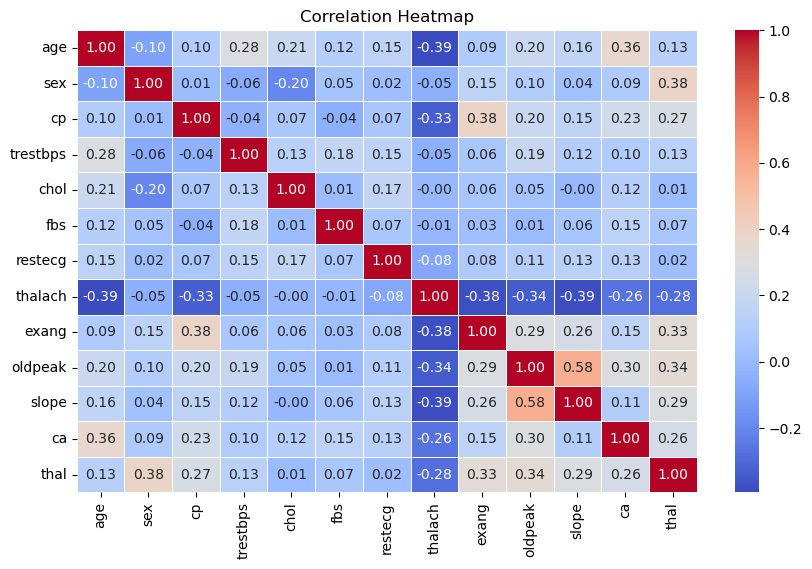

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

From this correlation matrix, we can conclude that thalach (max heart rate) has a strong negative correlation (-0.39) with age and oldpeak. We can assume that younger individuals tend to have a higher heart rate, while those with more severe heart disease (higher oldpeak) have lower thalach. We also found that ca (number of major vessels) has a strong positive correlation (0.36) with age. We can say that older individuals are more likely to have more blocked vessels. 

### 6)

In [6]:
X = X.dropna()
y = y.loc[X.index]

print(f"Length of X after transformations: {len(X)}")
print(f"Length of y after transformations: {len(y)}")

Length of X after transformations: 297
Length of y after transformations: 297


### 7)

In [7]:
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
X_cleaned = X.drop(columns=categorical_columns)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

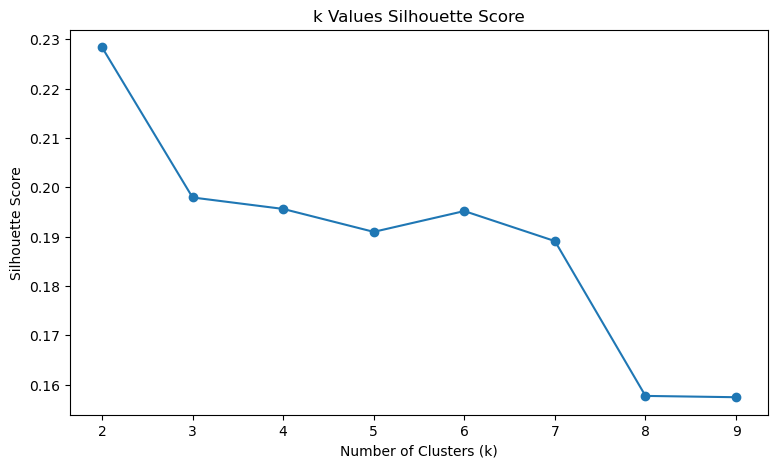

In [8]:
k_range = range(2,10)
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters = k, n_init = 20, random_state = 0)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(9, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters (k)")
plt.title("k Values Silhouette Score")
plt.show()

/Users/ashleychen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


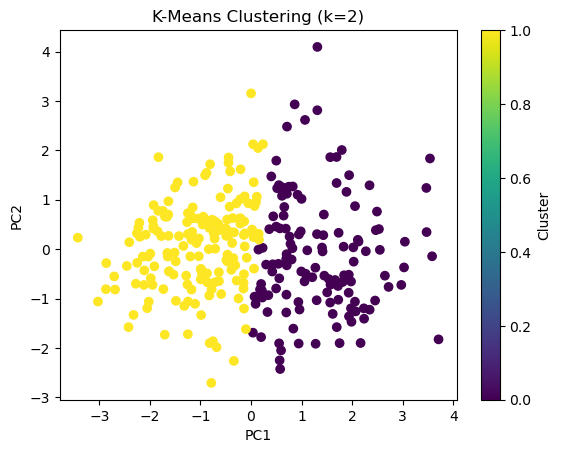

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=2, random_state=1)
clusters = kmeans.fit_predict(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title("K-Means Clustering (k=2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()

X_scaled_df = pd.DataFrame(X_scaled, columns=X_cleaned.columns)
X_scaled_df['cluster'] = clusters

### 8)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### 9) 

We are going to use logistic regression and random forest. Logistic regression is suitable for this assignment because it predicts a binary outcome, in which case, the target variable is 0 or 1. Random forest is also a good classifier to use because it has high predictive accuracy and does not depend on linear relationships, which is good for this dataset as there are both numerical and categorical variables.

### 10)

We are going to use accuracy and F1 scores to compare the classifier performance between logistic regression and random forest. We can create the confusion matrix from the predictions to calculate the accuracy and F1 scores. Accuracy scores are calculated by the number of correct predictions over the total number of predictions. 

\begin{align*}
\text{Accuracy} &= \frac{TP + TN}{TP + TN + FP + FN} \\
\text{Where:} \\
TP &= \text{True Positives} \\
TN &= \text{True Negatives} \\
FP &= \text{False Positives} \\
FN &= \text{False Negatives}
\end{align*}



To obtain the F1 score, we will need to use precision and recall that are derived from the confusion matrix. Once we calculate that, the F1 score can be calculated by:

\begin{align*}
\text{Precision} &= \frac{TP}{TP + FP} \\
\text{Recall} &= \frac{TP}{TP + FN} \\
F_1 &= \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
\end{align*}

Using these metrics, we can compare the overall accuracy and balance between the two classifiers to determine which classifier most optimal for predicting heart disease.

### 11)

In [54]:

import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] # test this out to see if accuracy improves
}

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Optimal parameters: ", grid_search.best_params_)
print("Cross-validation accuracy: {:.4f}".format(grid_search.best_score_))

best_log_reg = grid_search.best_estimator_
y_pred = best_log_reg.predict(X_test_scaled)
y_pred2 = best_log_reg.predict(X_train_scaled)

accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_pred2)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['No Heart Disease', 'Heart Disease'])

print(f"Test set accuracy: {accuracy:.4f}")
print(f"Train set accuracy: {train_accuracy:.4f}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(report)


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Optimal parameters:  {'C': 0.01, 'penalty': 'l2'}
Cross-validation accuracy: 0.8456
Test set accuracy: 0.8556
Train set accuracy: 0.8454
Confusion Matrix:
[[45  6]
 [ 7 32]]
Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.87      0.88      0.87        51
   Heart Disease       0.84      0.82      0.83        39

        accuracy                           0.86        90
       macro avg       0.85      0.85      0.85        90
    weighted avg       0.86      0.86      0.86        90



In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


rf_clf = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

rf_grid_search = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train_scaled, y_train)

print("Optimal Parameters:", rf_grid_search.best_params_)
print("Cross-Validation Accuracy:", rf_grid_search.best_score_)

best_rf_clf = rf_grid_search.best_estimator_
rf_y_pred = best_rf_clf.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_report = classification_report(y_test, rf_y_pred, target_names=['No Heart Disease', 'Heart Disease'])

print(f"Test Accuracy: {rf_accuracy:.4f}")
print("Confusion Matrix:")
print(rf_cm)
print("Classification Report:")
print(rf_report)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/Users/ashleychen/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ashleychen/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ashleychen/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ashleychen/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_valida

Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}
Cross-Validation Accuracy: 0.8166085946573751
Test Accuracy: 0.8444
Confusion Matrix:
[[44  7]
 [ 7 32]]
Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.86      0.86      0.86        51
   Heart Disease       0.82      0.82      0.82        39

        accuracy                           0.84        90
       macro avg       0.84      0.84      0.84        90
    weighted avg       0.84      0.84      0.84        90



### 12)

We are going to apply the LASSO for feature selection to our logistic regression classifier.

In [37]:
print(X.shape)       
print(y.shape)
print(X_train_scaled.shape)

(297, 13)
(297,)
(207, 14)


*Note: When training the LASSO, we realized that X (full feature set) has 13 columns, but LogisticRegression (scaled training data) is expecting 14 features as input. Therefore, we want to make sure the target volumn is not in X.*

In [38]:
# drop target column
df = pd.concat([X, y], axis=1)
X = df.drop(columns=['num'])  
y = df['num']  

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # scale only X

In [40]:
print(X_train_scaled.shape) 

(207, 13)


Now we can finally train the LASSO.

In [41]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import pandas as pd
import numpy as np

#lasso with cross-validation
lasso_cv = LogisticRegressionCV(
    penalty='l1',
    solver='saga',
    cv=5,
    max_iter=10000,
    scoring='accuracy',
    random_state=42
)
lasso_cv.fit(X_train_scaled, y_train)

LogisticRegressionCV(cv=5, max_iter=10000, penalty='l1', random_state=42,
                     scoring='accuracy', solver='saga')

In [42]:
#find the best c and lambda
best_c = lasso_cv.C_[0]
print("Best C (1/lambda):", best_c)
print("Best lambda (1/C):", 1 / best_c)

Best C (1/lambda): 2.782559402207126
Best lambda (1/C): 0.3593813663804626


In [43]:
# train lasso again with the best C
m_lasso = LogisticRegression(
    penalty='l1',
    C=best_c,
    solver='saga',
    max_iter=10000,
    random_state=42
)
m_lasso.fit(X_train_scaled, y_train)

LogisticRegression(C=2.782559402207126, max_iter=10000, penalty='l1',
                   random_state=42, solver='saga')

In [44]:
# selected features with coefficients
coeffs = m_lasso.coef_.reshape(-1)
feature_names = X.columns  
pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coeffs
})

,Feature,Coefficient
0,age,-0.054183
1,sex,0.893613
2,cp,0.560257
3,trestbps,0.636381
4,chol,0.309335
5,fbs,-0.666898
6,restecg,0.314907
7,thalach,-0.458236
8,exang,0.464750
9,oldpeak,0.491677


In [45]:
# class 1 probabilities
m_lasso_pre_prob = m_lasso.predict_proba(X_test_scaled)[:, 1]

In [46]:
df_eval = pd.DataFrame({'prob': m_lasso_pre_prob, 'y_test': y_test})

In [47]:
# ROC and KS threshold
fpr, tpr, thresholds = roc_curve(df_eval.y_test, df_eval.prob)
ks_statistic = np.max(tpr - fpr)
ks_threshold = thresholds[np.argmax(tpr - fpr)]
print("KS threshold:", ks_threshold)

KS threshold: 0.42760641677437833


In [48]:
# sensitivity & specificity
ind = np.where(np.isclose(thresholds, ks_threshold, atol=0.001))
print("Sensitivity:", tpr[ind])
print("Specificity:", 1 - fpr[ind])

Sensitivity: [0.87179487]
Specificity: [0.76470588]


In [49]:
# classify based on KS threshold
df_eval['y_test_pred'] = df_eval.prob.map(lambda x: 1 if x > ks_threshold else 0)

In [50]:
# Accuracy, AUC and Confusion Matrix
print("KS Threshold Accuracy:", accuracy_score(df_eval.y_test, df_eval.y_test_pred))
print("AUC Score:", roc_auc_score(df_eval.y_test, df_eval.prob))
print("Confusion Matrix:", confusion_matrix(df_eval.y_test, df_eval.y_test_pred))

KS Threshold Accuracy: 0.8
AUC Score: 0.8798391151332328
Confusion Matrix: [[39 12]
 [ 6 33]]


In [58]:
# Classification Report for LASSO
lasso_report=classification_report(df_eval.y_test, df_eval.y_test_pred, target_names=['No Heart Disease', 'Heart Disease'])
print("Classification Report:")
print(lasso_report)

Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.87      0.76      0.81        51
   Heart Disease       0.73      0.85      0.79        39

        accuracy                           0.80        90
       macro avg       0.80      0.81      0.80        90
    weighted avg       0.81      0.80      0.80        90



### 13)

Recall the three classifiers and their classification reports:

In [59]:
print("Logistic Regression Classification Report:")
print(report)
print("Random Forest Classification Report:")
print(rf_report)
print("LASSO Classification Report:")
print(lasso_report)

Logistic Regression Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.87      0.88      0.87        51
   Heart Disease       0.84      0.82      0.83        39

        accuracy                           0.86        90
       macro avg       0.85      0.85      0.85        90
    weighted avg       0.86      0.86      0.86        90

Random Forest Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.86      0.86      0.86        51
   Heart Disease       0.82      0.82      0.82        39

        accuracy                           0.84        90
       macro avg       0.84      0.84      0.84        90
    weighted avg       0.84      0.84      0.84        90

LASSO Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.87      0.76      0.81        51
   Heart Disease       0.73      0.85      0.79        39

        accur

We will only focus on the two metrices we selected: **accuracy and F1 score**. By comparing them among the 3 classifiers, we have the following findings:

1. The **full logistic regression model** from (11) achieved the highest overall accuracy (0.86) and the highest heart disease F1 score (0.83), suggesting that it has excellent general performances.

2. While the **LASSO** has the lowest accuracy, it is still very acceptable (0.80). It aslo holds the highest recall (0.85) for predicting heart disease, meaning that it is the best model at identifying most of the true positive cases. 

Impact of Feature Selection:

With the **LASSO**, we successfully reduced the numbers of features used in the model, keeping it interpretable. While the accuracy number went down a bit because of this simplification in the model, it maintained a very strong recall, which helped improve the model's performance on capturing positive heart disease cases. This is very useful and importnant for medical diagnostics dataset like this. 

### 14)

From (13), we mentioned that while full logistic regression model had slightly higher accuracy and F1 score, the LASSO provided a more simplified and interpetable model by selecting only the most important features. For a medical diagnostics dataset like this, we prioritze the ability to identify heart disease cases over the higheset possible accuracy. We also prefer the simplier model as the reduction in complexity helps prevent overfitting, improves computitional efficiency that are super essential for decision making. That is, we consider the **LASSO** as the best interprertable model.

In [63]:
# from (12), we had:
coeffs = m_lasso.coef_.reshape(-1)
feature_names = X.columns  
features_coef = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coeffs
})

# we want to make it in descending order to address the largest coef (most iportant feasure)
important_features = features_coef[features_coef['Coefficient'] != 0].sort_values(by='Coefficient', ascending=False)

print("Important features by the LASSO:")
print(important_features)

Important features by the LASSO:
     Feature  Coefficient
11        ca     1.342414
1        sex     0.893613
3   trestbps     0.636381
12      thal     0.571055
2         cp     0.560257
9    oldpeak     0.491677
8      exang     0.464750
6    restecg     0.314907
4       chol     0.309335
10     slope     0.289350
0        age    -0.054183
7    thalach    -0.458236
5        fbs    -0.666898


From the output, we have the following findings:

1. The most important predictor variable found by the LASSO was `ca` (number of major vessels colored by fluoroscopy) since it has the largest positive coefficient. 

### 15. (Bonus)

We are using the sub-groups from KMeans as a feature to improve the logistic regression model. After adding this feature and retraining the model, the classifier showed improved performance compared to the original model. We see that the test set accuracy improved from 0.8556 to 0.9000 and the F1-score also increased for both classes.

In [29]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_columns = [col for col in X.columns if col not in categorical_columns]
X_num = X[numerical_columns]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_num)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_num = X_train[numerical_columns]
X_test_num = X_test[numerical_columns]

X_train_pca = pca.transform(X_train_num)
X_test_pca = pca.transform(X_test_num)

train_clusters = kmeans.predict(X_train_pca).reshape(-1, 1)
test_clusters = kmeans.predict(X_test_pca).reshape(-1, 1)

X_train_num = np.hstack((X_train.values, train_clusters))
X_test_num = np.hstack((X_test.values, test_clusters))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

log_reg = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_scaled, y_train)

print("Optimal parameters: ", grid_search.best_params_)
print("Cross-validation accuracy: {:.4f}".format(grid_search.best_score_))

best_log_reg = grid_search.best_estimator_
y_pred = best_log_reg.predict(X_test_scaled)
y_pred2 = best_log_reg.predict(X_train_scaled)

accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_pred2)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['No Heart Disease', 'Heart Disease'])

print(f"\nTest set accuracy: {accuracy:.4f}")
print(f"Train set accuracy: {train_accuracy:.4f}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(report)


Fitting 5 folds for each of 14 candidates, totalling 70 fits


/Users/ashleychen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Optimal parameters:  {'C': 0.01, 'penalty': 'l2'}
Cross-validation accuracy: 0.8211

Test set accuracy: 0.9000
Train set accuracy: 0.8309
Confusion Matrix:
[[47  2]
 [ 7 34]]
Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.87      0.96      0.91        49
   Heart Disease       0.94      0.83      0.88        41

        accuracy                           0.90        90
       macro avg       0.91      0.89      0.90        90
    weighted avg       0.90      0.90      0.90        90



\newpage 

### References

Stack Overflow. (2014, February 16). Fine-tuning parameters in logistic regression. Stack Overflow. https://stackoverflow.com/questions/21816346/fine-tuning-parameters-in-logistic-regression

Stack Overflow. (2016, July 17). Random Forest Hyperparameter Tuning - scikit-learn using GridSearchCV. Stack Overflow. https://stackoverflow.com/questions/35164310/random-forest-hyperparameter-tuning-scikit-learn-using-gridsearchcv